# Enquesta Condicions de vida dels usuaris dels CSS
# Tratamiento de datos
***
# 4. Análisis de datos - Aplicación de métodos multivariables al caso de uso

***
***
## 4.1 Carga de datos y funciones de scripts externos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('data_final/final_df.pkl')
print(df.shape)

df_mayores = df[df['Edad'] >= 65]
print(df_mayores.shape)

(6624, 143)
(1597, 143)


In [2]:
from scripts.utils import filter_variables

from scripts.mca import plot_scree_mca, apply_mca, plot_mca, plot_multiple_mca, optimize_mca_variance

***
***
## 4.2 Necesidades de las personas mayores

Variables relevantes seleccionadas:
- Generales:
  - "Sexo"
  - "Edad_Recod2"
  - "Tipo_Hogar2"
  - "Lugar_Nacimiento"
- Uso de CSS:
  - "Visita_CSS_Econom"
  - "Visita_CSS_Depend"
  - "Visita_CSS_Vivienda"
  - "Visita_CSS_Familia"
- Economicas:
  - "Riesgo_Pobreza_60"
  - "Riesgo_Pobreza_30"
  - "Fin_De_Mes"
- Otras:
  - "Propietat_Habitatge"

### 4.2.1 MCA

#### Variables: Motivo visita Dependencia (y Sexo, Edad, Tipo_Hogar, Propietat, Riesgo_Pobreza)

In [3]:
variables_categoricas = [
    'Sexo', 'Edad_Recod2', 'Tipo_Hogar2', 'Propietat_Habitatge', 'Riesgo_Pobreza_60',
    'Visita_CSS_Depend', 'Nivel_Estudios'
]
df_filtered = filter_variables(df_mayores[variables_categoricas])
df_filtered = df_filtered.astype('object')

Shape original del DataFrame: (1597, 7)
Shape del DataFrame después del filtrado: (1323, 7)


In [4]:
mca_model, df_mca_coords = apply_mca(df_filtered, variables_categoricas, n_components=2)

Varianza Explicada por Dimensión:
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.279         9.30%                      9.30%
1              0.196         6.54%                     15.85%


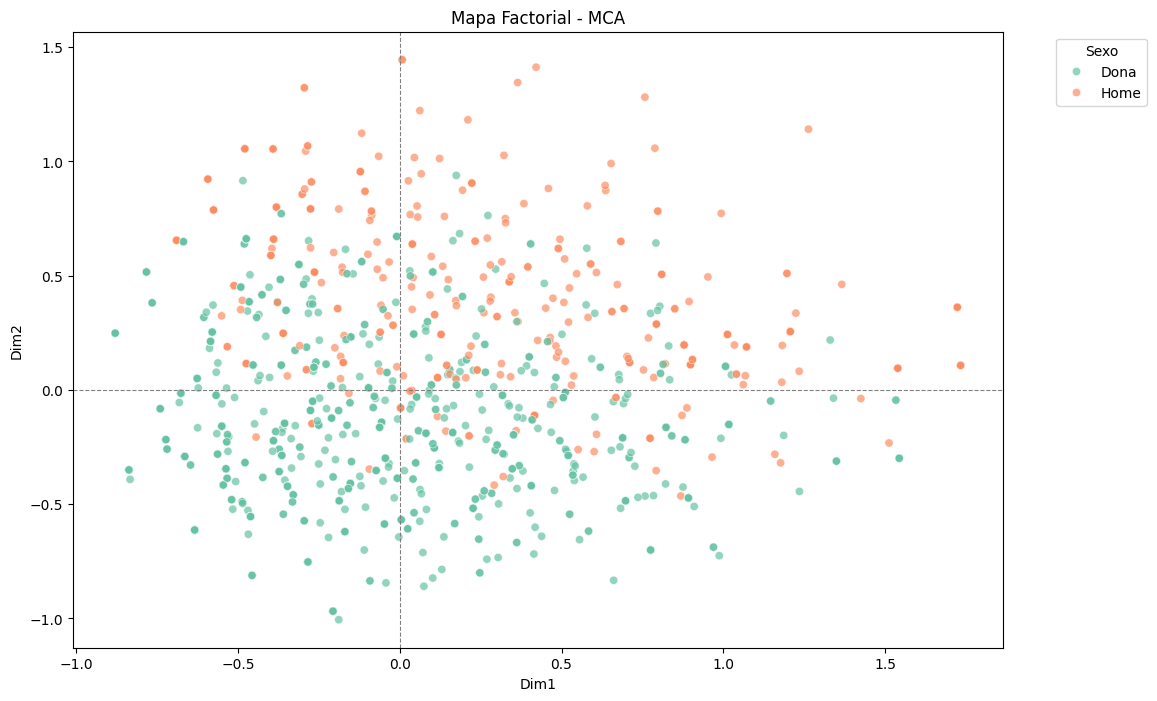

In [5]:
plot_mca(df_mca_coords, hue_var='Sexo')

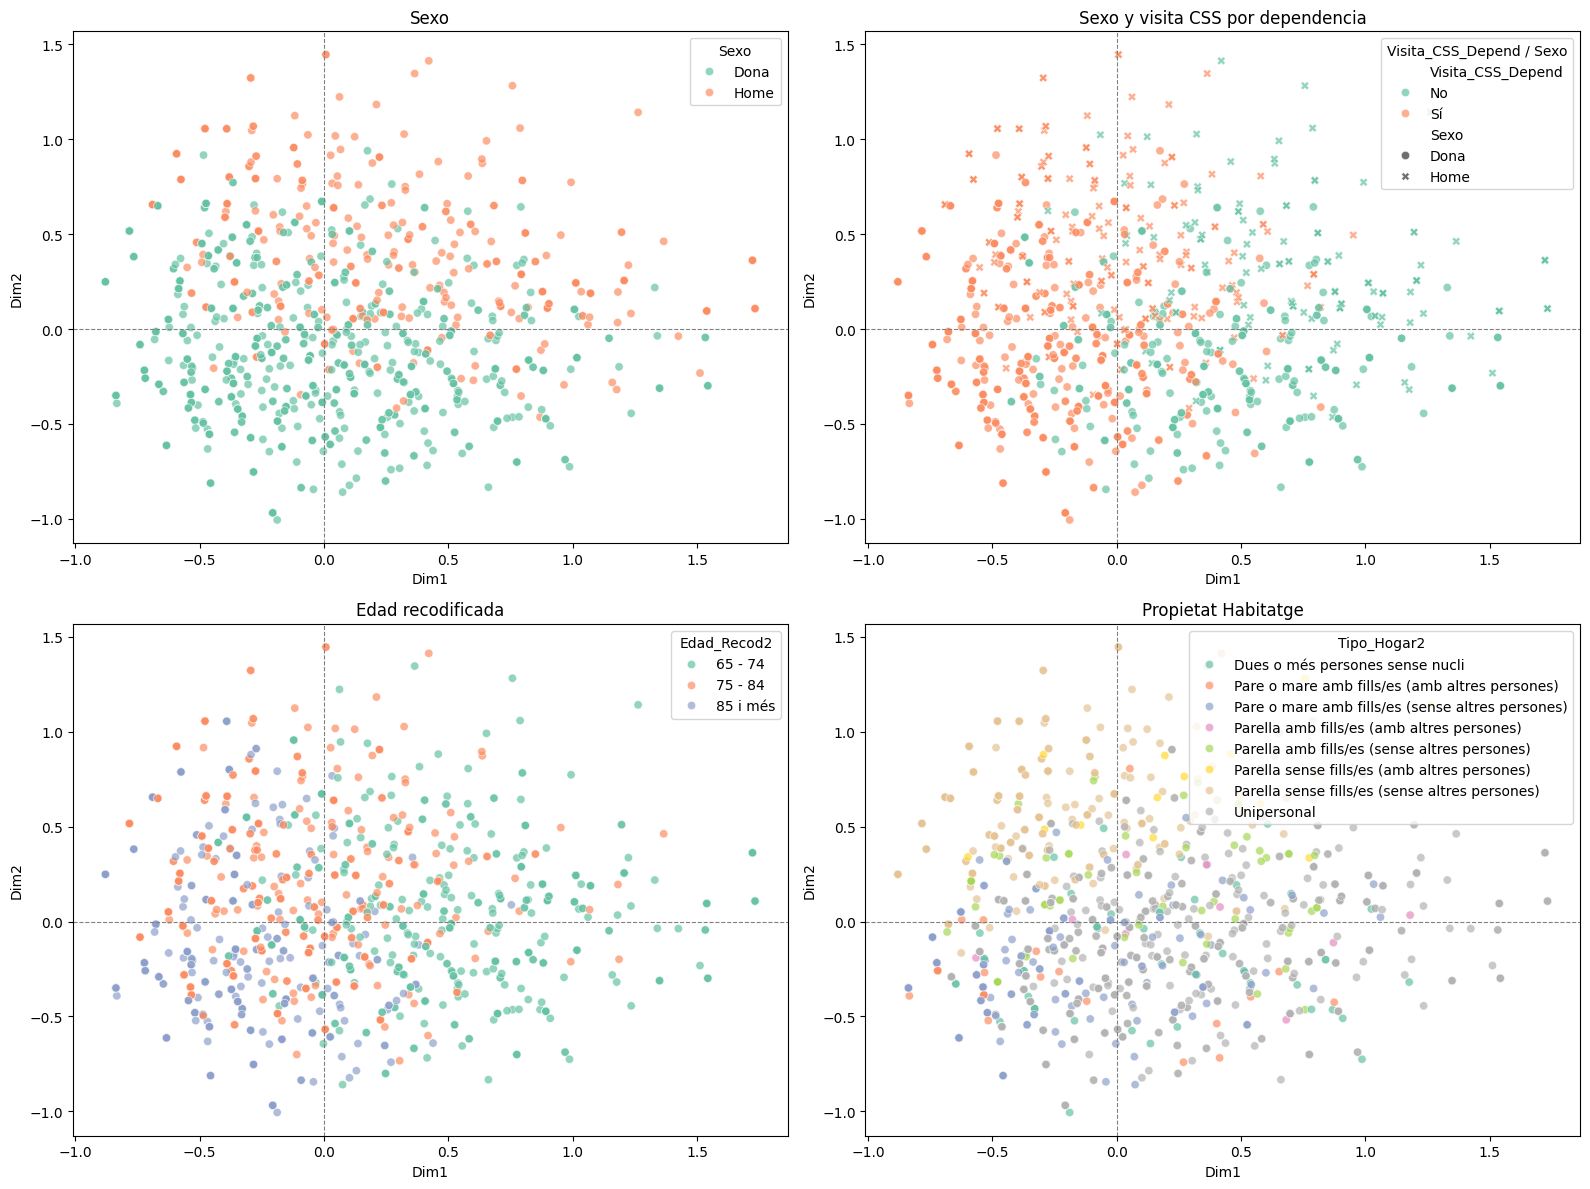

In [6]:
configs = [
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Sexo", "title": "Sexo"},
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Visita_CSS_Depend", "style_var": "Sexo", "title": "Sexo y visita CSS por dependencia"},
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Edad_Recod2", "title": "Edad recodificada"},
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Tipo_Hogar2", "title": "Propietat Habitatge"},
]

plot_multiple_mca(df_mca_coords, configs)

#### Variables: Motivo visita Economico (y Sexo, Edad, Tipo_Hogar, Propietat, Riesgo_Pobreza)

In [7]:
variables_categoricas = [
    'Sexo', 'Edad_Recod2', 'Tipo_Hogar2', 'Propietat_Habitatge', 'Riesgo_Pobreza_60',
    'Visita_CSS_Econom', 'Nivel_Estudios'
]
df_filtered = filter_variables(df_mayores[variables_categoricas])
df_filtered = df_filtered.astype('object')

Shape original del DataFrame: (1597, 7)
Shape del DataFrame después del filtrado: (1323, 7)


In [8]:
mca_model, df_mca_coords = apply_mca(df_filtered, variables_categoricas, n_components=2)

Varianza Explicada por Dimensión:
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.265         8.82%                      8.82%
1              0.198         6.60%                     15.42%


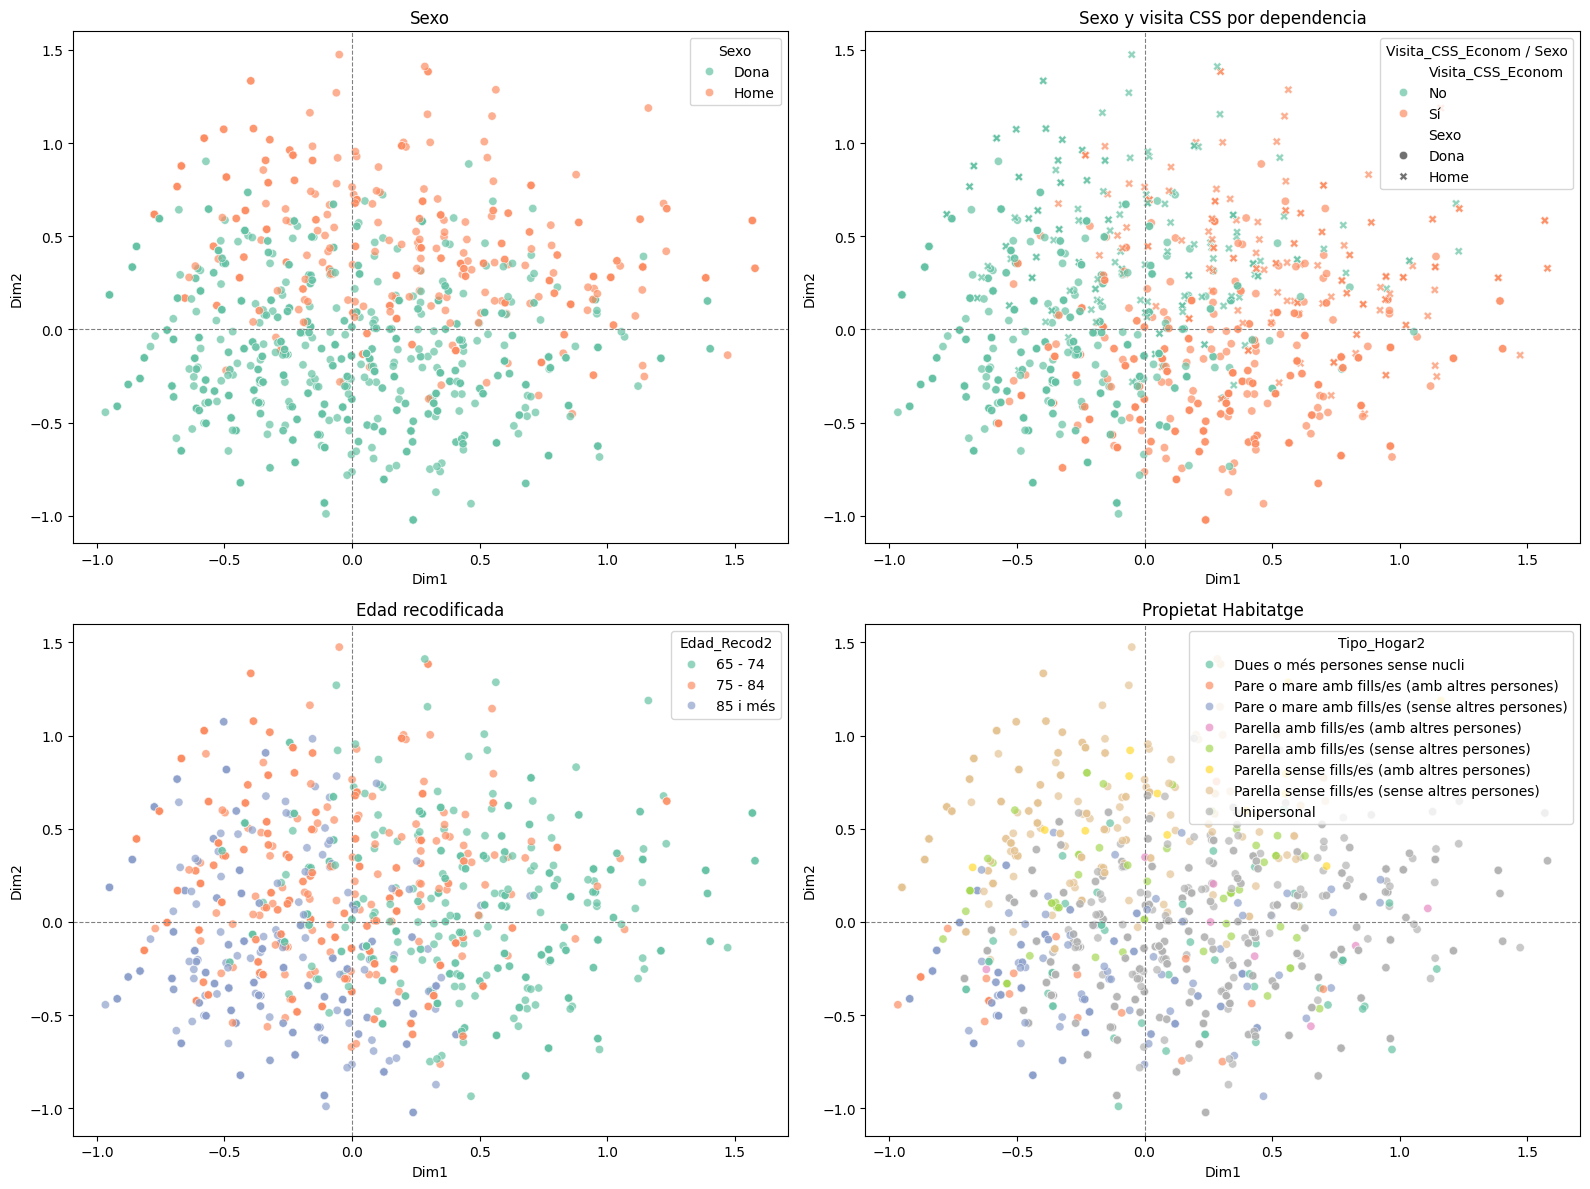

In [9]:
configs = [
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Sexo", "title": "Sexo"},
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Visita_CSS_Econom", "style_var": "Sexo", "title": "Sexo y visita CSS por dependencia"},
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Edad_Recod2", "title": "Edad recodificada"},
    {"x_dim": "Dim1", "y_dim": "Dim2", "hue_var": "Tipo_Hogar2", "title": "Propietat Habitatge"},
]

plot_multiple_mca(df_mca_coords, configs)

***
***
## 4.3 Estado de salud

Variables relevantes seleccionadas (Seguiré por aqui!!):
- Generales:
  - "Sexo"
  - "Edad_Recod2"
  - "Tipo_Hogar2"
  - "Lugar_Nacimiento"
- Salud:
  - "Estado_Salud_Recod"
- Uso de CSS:
  - "Visita_CSS_Depend"
- Economicas:
  - "Riesgo_Pobreza_60"
  - "Riesgo_Pobreza_30"
  - "Fin_De_Mes"
- Otras:
  - "Propietat_Habitatge"

### 4.3.1 MCA

In [7]:
always_include = ['Sexo', 'Tipo_Hogar2']
candidate_variables = ['Nivel_Estudios', 'Lugar_Nacimiento', 
                       'Situacion_Laboral', 'Tareas_Domesticas']
target_variable = ['Estado_Salud_Recod']

#### Variables X

In [8]:
results = optimize_mca_variance(df, always_include, candidate_variables, n_components=2)

results_df = pd.DataFrame({
    "Variables": results["variables"],
    "Varianza Explicada Dim1": results["varianza_dim1"],
    "Varianza Explicada Dim2": results["varianza_dim2"],
    "Varianza Explicada Total": results["varianza_total"]
}).sort_values(by="Varianza Explicada Total", ascending=False)

results_df

,Variables,Varianza Explicada Dim1,Varianza Explicada Dim2,Varianza Explicada Total
0,"[Sexo, Tipo_Hogar2]",0.652250,0.500000,1.152250
4,"[Sexo, Tipo_Hogar2, Tareas_Domesticas]",0.614149,0.477693,1.091842
3,"[Sexo, Tipo_Hogar2, Situacion_Laboral]",0.528676,0.404185,0.932861
10,"[Sexo, Tipo_Hogar2, Situacion_Laboral, Tareas_...",0.519036,0.410504,0.929540
9,"[Sexo, Tipo_Hogar2, Lugar_Nacimiento, Tareas_D...",0.489676,0.388353,0.878029
2,"[Sexo, Tipo_Hogar2, Lugar_Nacimiento]",0.483277,0.392381,0.875658
7,"[Sexo, Tipo_Hogar2, Nivel_Estudios, Tareas_Dom...",0.462068,0.365347,0.827415
14,"[Sexo, Tipo_Hogar2, Lugar_Nacimiento, Situacio...",0.466672,0.341743,0.808414
1,"[Sexo, Tipo_Hogar2, Nivel_Estudios]",0.439657,0.362413,0.802070
8,"[Sexo, Tipo_Hogar2, Lugar_Nacimiento, Situacio...",0.473651,0.320741,0.794392


In [13]:
# Variables categóricas a incluir en el análisis
variables_categoricas = ['Sexo', 'Tipo_Hogar2', 'Lugar_Nacimiento', 'Situacion_Laboral', 'Tareas_Domesticas', 'Visita_CSS_Depend']
target = ['Estado_Salud_Recod']

all_vars = variables_categoricas + target

df_filtered = filter_variables(df[all_vars])

Shape original del DataFrame: (6624, 7)
Shape del DataFrame después del filtrado: (6181, 7)


In [14]:
# Aplicar MCA
mca_model, df_mca_coords = apply_mca(df_filtered, variables_categoricas, target, n_components=2)

Varianza Explicada por Dimensión:
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.455        10.51%                     10.51%
1              0.303         6.99%                     17.50%


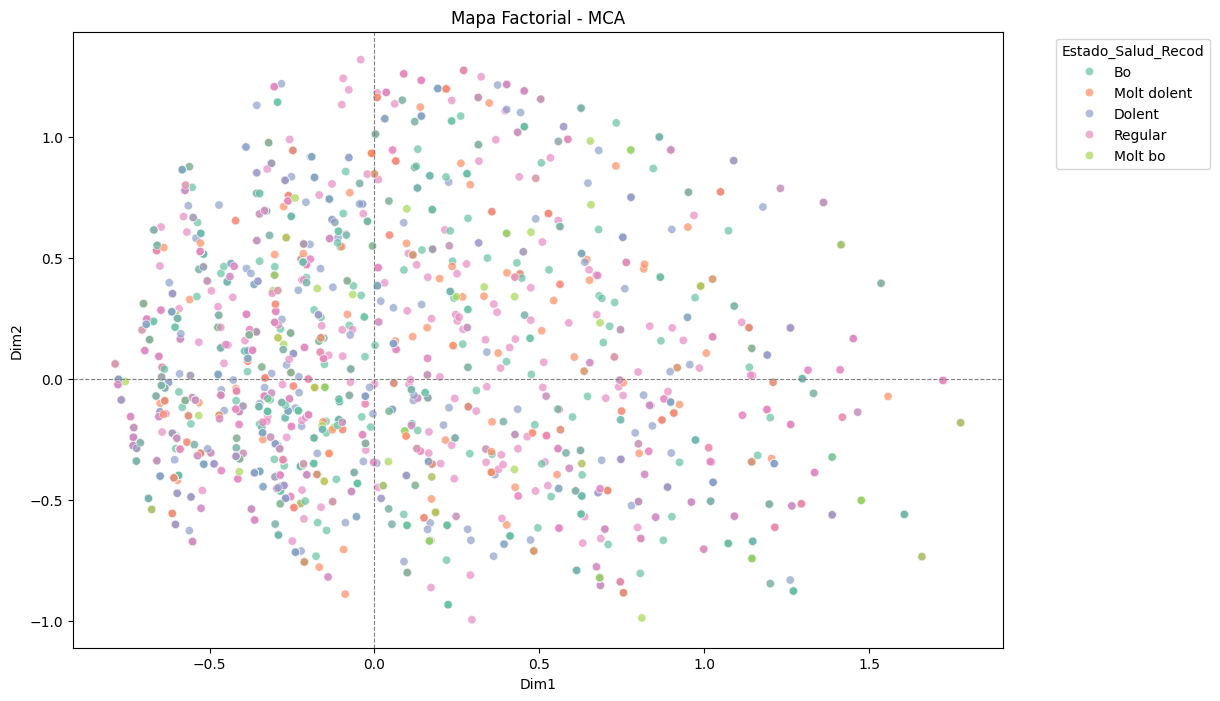

In [15]:
# Graficar resultados
plot_mca(df_mca_coords, hue_var='Estado_Salud_Recod')

***
***
## 4.6 Organización de cuidados y trabajo doméstico

Donde estuviera el tipo de hogar nuevo (parentesco), la categoría profesional, el nivel estudios, 
Ademas de las variables que veo que estas incluyendo, sexo, edad recod, etc.

### 4.6.1 MCA

In [ ]:
always_include = ['Sexo', 'Nivel_Estudios']
candidate_variables = ['Tipo_Hogar', 'Visita_CSS_Econom', 'Pais_Nacimiento', 'Situacion_Laboral']

#### Variables X

In [ ]:
results = optimize_mca_variance(df, always_include, candidate_variables, n_components=2)

results_df = pd.DataFrame({
    "Variables": results["variables"],
    "Varianza Explicada Dim1": results["varianza_dim1"],
    "Varianza Explicada Dim2": results["varianza_dim2"],
    "Varianza Explicada Total": results["varianza_total"]
}).sort_values(by="Varianza Explicada Total", ascending=False)

results_df

,Variables,Varianza Explicada Dim1,Varianza Explicada Dim2,Varianza Explicada Total
0,"[Sexo, Nivel_Estudios]",0.526361,0.500000,1.026361
4,"[Sexo, Nivel_Estudios, Situacion_Laboral]",0.446184,0.390482,0.836666
3,"[Sexo, Nivel_Estudios, Pais_Nacimiento]",0.431890,0.388329,0.820218
1,"[Sexo, Nivel_Estudios, Tipo_Hogar]",0.451095,0.355842,0.806937
7,"[Sexo, Nivel_Estudios, Tipo_Hogar, Situacion_L...",0.416330,0.332405,0.748734
10,"[Sexo, Nivel_Estudios, Pais_Nacimiento, Situac...",0.418669,0.315536,0.734205
6,"[Sexo, Nivel_Estudios, Tipo_Hogar, Pais_Nacimi...",0.390102,0.336067,0.726169
2,"[Sexo, Nivel_Estudios, Visita_CSS_Econom]",0.372270,0.340996,0.713266
13,"[Sexo, Nivel_Estudios, Tipo_Hogar, Pais_Nacimi...",0.403524,0.287496,0.691020
9,"[Sexo, Nivel_Estudios, Visita_CSS_Econom, Situ...",0.369090,0.292680,0.661770
